Author : Vrajkumar Patel
Date : 10/17/2025

 Module 4: Predicting Housing Prices with Linear Regression

1. Import lib

In [65]:
#Import lib


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Load California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
# Target variable (housing price)
df['MedHouseVal'] = california.target

2. Load dataset

In [66]:
#load Dataset
df = pd.read_csv("californiahousingprices.csv")

3. Basic data exploration

In [67]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Unnamed: 0  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0           0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1           1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2           2  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3           3  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4           4  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  MedHouseVal  
0     37.88    -122.23        4.526  
1     37.86    -122.22        3.585  
2     37.85    -122.24        3.521  
3     37.85    -122.25        3.413  
4     37.85    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20640 non-null  int64  
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 no

4. Visualize relationships between key features and target variable

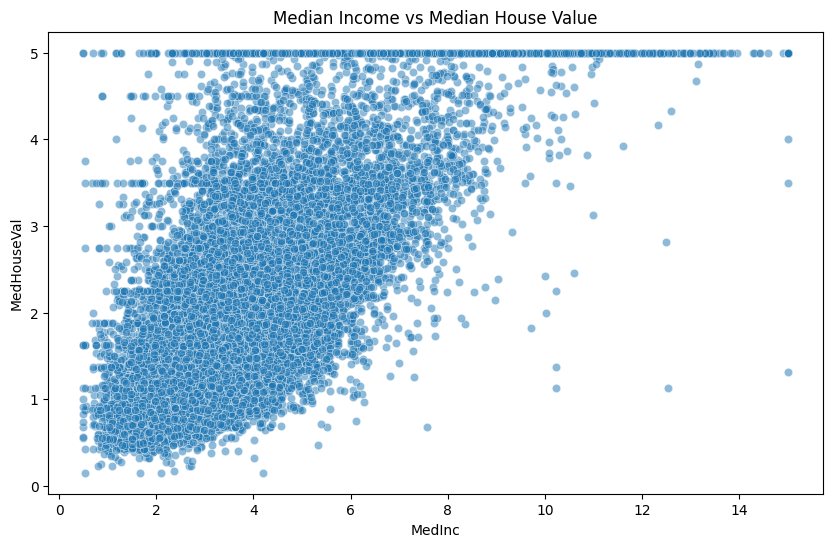

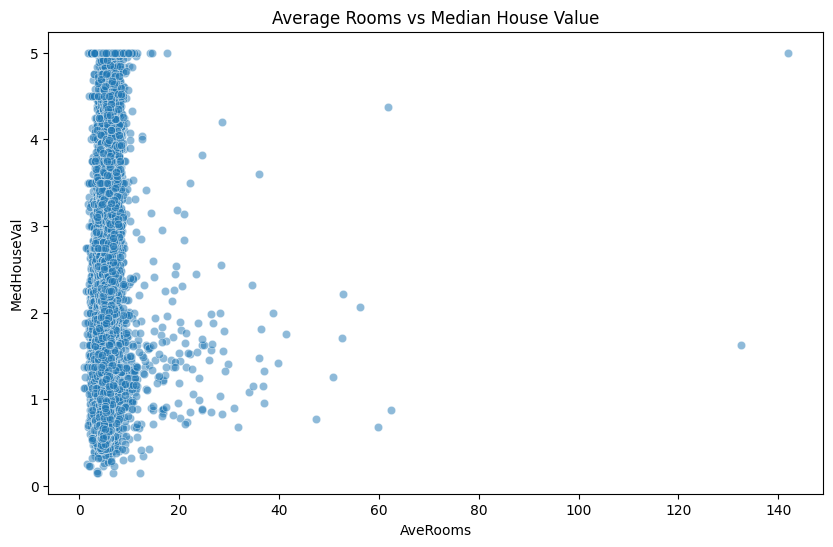

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Average Rooms vs Median House Value')
plt.show()

 5. Preprocessing - handle missing values

In [69]:
df = df.dropna()

Optional: Standardize features

In [70]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

6. Train-Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Train linear regg.

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


8. Print model coefficients

In [73]:
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:\n", coefficients)


Feature Coefficients:
             Coefficient
Unnamed: 0     0.037146
MedInc         0.854787
HouseAge       0.130940
AveRooms      -0.312272
AveBedrms      0.377590
Population    -0.000841
AveOccup      -0.037196
Latitude      -0.883686
Longitude     -0.852575


9. Evaluate Model Performance

In [74]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.5547


10. Visualize predictions vs actual values

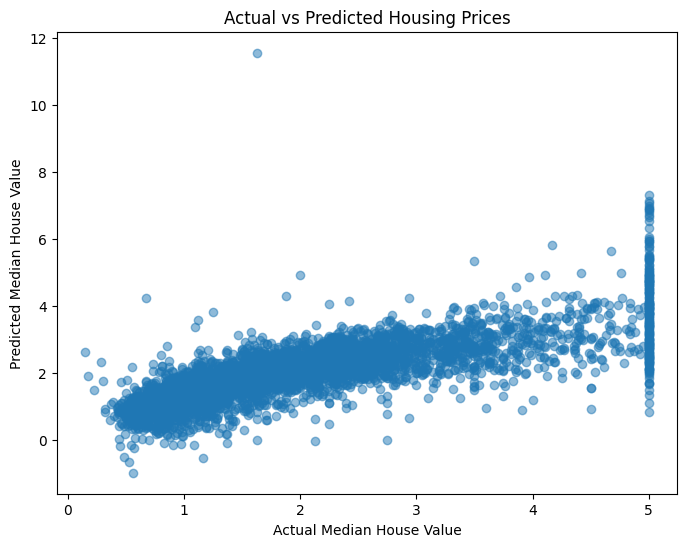

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

11. Report Findings

In [76]:
print("\n--- Report Summary ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
top_features = coefficients.abs().sort_values(by='Coefficient', ascending=False).head(3)
print("\nTop predictive features:\n", top_features)
print("\nObservations:")
print("- Median income (MedInc) is typically the strongest predictor of house prices.")
print("- The MSE provides an estimate of how close predictions are to actual prices.")
print("- Linear Regression assumes a linear relationship; non-linear patterns may not be captured well.")


--- Report Summary ---
Mean Squared Error (MSE): 0.5547

Top predictive features:
            Coefficient
Latitude      0.883686
MedInc        0.854787
Longitude     0.852575

Observations:
- Median income (MedInc) is typically the strongest predictor of house prices.
- The MSE provides an estimate of how close predictions are to actual prices.
- Linear Regression assumes a linear relationship; non-linear patterns may not be captured well.
